# 입문자를 위한, 파이썬/R 데이터 분석

## Today's mission

- 워드클라우드 : 다음뉴스 키워드 검색 및 텍스트 분석
- 워드클라우드 : soynlp 라이브러리 활용 명사 추출

## 워드클라우드 : soynlp 라이브러리 활용 명사 추출
* soynlp(https://github.com/lovit/soynlp) 로 토큰화하고 명사를 추출해 워드클라우드 그려보기

In [ ]:
# !pip install soynlp
# !pip show soynlp
# !pip install wordcloud
# !pip install koreanize-matplotlib

In [1]:
import pandas as pd
import numpy as np
import re
import koreanize_matplotlib
import os
import platform
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기
*  데이터 출처 : https://github.com/akngs/petitions   (과거데이터만)

In [2]:
df = pd.read_csv(f"data/petition.csv", index_col="article_id",
                        parse_dates=['start', 'end'])
df.shape

(377756, 7)

In [3]:
df.shape

(377756, 7)

In [4]:
df.tail()

,start,end,answered,votes,category,title,content
article_id,,,,,,,
492039,2019-01-09,2019-02-08,0,48,인권/성평등,박종철 의원. 폭행구속수사 및 의원직 박탈 청원합니다,나라돈으로 해외연수가서 현지 동반 가이드를 때려 안경 파편이 얼굴이 꽂혔답니다. C...
492040,2019-01-09,2019-02-08,0,5,정치개혁,각 정상들은 들으시요 국회의원을 학력과 무관한 양심 및 윤리가 있는 서민이 되어...,각 정당은 현재 국회의원 개개인을 심사하면 지탄받은 사람이 국\n회를 장악하고 있습...
492041,2019-01-09,2019-02-08,0,1,외교/통일/국방,남한땅에 옥류관을 오픈해주세요,말그대로 옥류관을 여기서 열면 진짜 재미있고 신나는 일이 일어날것 같은 느낌이 듭니...
492042,2019-01-09,2019-02-08,0,4,정치개혁,임종석실장님 수고많으셨습니다.,범죄정권이후 많은 어려움을 갖고 시작한 국민의정부.\n저급한 자칭 보수단체와 한국당...
492043,2019-01-09,2019-02-08,0,1,행정,예천군과 환경부를 규탄합니다. 어불성설인 가축사육 관련 법규를 개정해주세요!,해당 사건이 발생한 곳은 요즘은 매체에서 매일 나오는 곳으로 '군의원의 외유성 해외...


In [5]:
df.head()

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [16]:
df['category'].unique()

array(['안전/환경', '기타', '미래', '일자리', '보건복지', '정치개혁', '경제민주화', '인권/성평등',
       '외교/통일/국방', '육아/교육', '문화/예술/체육/언론', '반려동물', '교통/건축/국토', '행정',
       '농산어촌', '저출산/고령화대책', '성장동력'], dtype=object)

## 자신의 관심사에 맞는 단어로 데이터를 가져온다.

In [6]:
p = r'.*(폭력|범죄|살인|상해|절도).*'
care = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
care.shape

(46623, 7)

In [ ]:
p = r'.*(돌봄|육아|초등|보육).*'
care = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
care.shape

In [7]:
care.head(2)

,start,end,answered,votes,category,title,content
article_id,,,,,,,
56,2017-08-19,2017-11-17,0,5,보건복지,장애아의 상태에 따른 장애아돌봄도우미 정책의 한계에 관하여...읽어주셨으면 하고 글...,"안녕하세요. 저는 그냥 평범한 대학생이며, 고등학생인 자폐 1급 남동생을 둔 누나입..."
78,2017-08-20,2017-08-27,0,0,교통/건축/국토,아파트 비리와 맞서다 불법 해임된 아파트 회장,청와대 청원서\n아파트 비리와 맞선 입주자 회장\nFact\n1. 아파트 비리와 타...


In [8]:
sample_index = 56

In [ ]:
sample_index = 24

In [9]:
sample_title = care.loc[sample_index, 'title']
sample_title

'장애아의 상태에 따른 장애아돌봄도우미 정책의 한계에 관하여...읽어주셨으면 하고 글을 써봅니다.'

### sample_content 내용 확인

In [10]:
sample_content = care['content'][sample_index]
sample_content

'안녕하세요. 저는 그냥 평범한 대학생이며, 고등학생인 자폐 1급 남동생을 둔 누나입니다.\\n저는 사실 장애인과 관련한 정책에 대해서 잘 알지 못하며 가족 역시 그러하기에 이미 제가 말씀드리는 것을 해결할 만한 정책이 있는 상태일지도 모릅니다. 하지만 전 일단 그런 정책이 없다는 가정하에 지금 저의 가족을 포함한 타 가정의 상황을 알려드리고자 합니다.\\n먼저 우리 가정은 부모님과 저와 동생, 이렇게 4명이 함께 살고 있습니다.\\n현재 우리 가정은 일정 금액을 지불하고 도우미 서비스를 이용하고 있습니다. 이 서비스는 어느 부분에서는 아주 유용합니다. 아버지는 생계를 위해 일하셔야 하고 어머니도 이 서비스덕에 어느 정도 동생에게 얽매이지 않고 부업이라도 하실 수 있으니까요. 지금 당장은 크게 문제가 될 일은 없습니다. 동생이 다른 장애아동들에 비해 순하고 어머니께서 도우미의 편의를 봐주시는 편이기에 돌보기 쉬워서 오히려 인기가 있을 정도이죠.\\n하지만 동생의 상태가 점차 악화되어 현재 종종 대소변을 가리지 못하는 문제가 발생하고 돌봐주는 도우미들은 자신의 아이가 아니기에 동생을 씻기고 옷을 갈아입히는 등의  행위를 꺼려합니다. 그렇게 되면 어머니는 일하는 도중에 전화를 받고 그 날 남은 일은 하지 못하고 집에 돌아와 아이를 씻기고 학원 갈 준비를 해야 하는 거죠. 결국 어머니는 부업을 하다가 다른 일을 찾아보라는 사장님의 말씀에 일자리를 잃어야 했습니다.\\n아버지는 지금 연세가 있으셔서 일하시고 계시기는 하지만 월급이 150만원 정도입니다. 그리고 지금 연금을 받고 있어서 기초수급자는커녕 차상위 계층에도 속하지 않습니다. 저도 현재 원하는 공부를 하고 싶어서 취업을 하지 못한 상태고 종종 아르바이트로 부모님께 손을 벌리지 않는 정도밖에 되지 않습니다.\\n우리 가정만 그렇다하면 제가 문제인 것이라 생각하고 넘어갈 수 있습니다. 하지만 어머니의 주변에 계신 장애아를 자녀로 둔 부모님들을 보면 더하면 더했지 덜하지는 않았습니다. 아이가 폭력성이 심해 도우미는

## 토큰화

Soynlp에서 제공하는 RegexTokenizer를 사용하여 토큰화 

# 토큰화

In [18]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [19]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['장애아의',
 '상태에',
 '따른',
 '장애아돌봄도우미',
 '정책의',
 '한계에',
 '관하여',
 '...',
 '읽어주셨으면',
 '하고',
 '글을',
 '써봅니다',
 '.']

In [20]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content#[:20]

['안녕하세요',
 '.',
 '저는',
 '그냥',
 '평범한',
 '대학생이며',
 ',',
 '고등학생인',
 '자폐',
 '1',
 '급',
 '남동생을',
 '둔',
 '누나입니다',
 '.\\',
 'n',
 '저는',
 '사실',
 '장애인과',
 '관련한',
 '정책에',
 '대해서',
 '잘',
 '알지',
 '못하며',
 '가족',
 '역시',
 '그러하기에',
 '이미',
 '제가',
 '말씀드리는',
 '것을',
 '해결할',
 '만한',
 '정책이',
 '있는',
 '상태일지도',
 '모릅니다',
 '.',
 '하지만',
 '전',
 '일단',
 '그런',
 '정책이',
 '없다는',
 '가정하에',
 '지금',
 '저의',
 '가족을',
 '포함한',
 '타',
 '가정의',
 '상황을',
 '알려드리고자',
 '합니다',
 '.\\',
 'n',
 '먼저',
 '우리',
 '가정은',
 '부모님과',
 '저와',
 '동생',
 ',',
 '이렇게',
 '4',
 '명이',
 '함께',
 '살고',
 '있습니다',
 '.\\',
 'n',
 '현재',
 '우리',
 '가정은',
 '일정',
 '금액을',
 '지불하고',
 '도우미',
 '서비스를',
 '이용하고',
 '있습니다',
 '.',
 '이',
 '서비스는',
 '어느',
 '부분에서는',
 '아주',
 '유용합니다',
 '.',
 '아버지는',
 '생계를',
 '위해',
 '일하셔야',
 '하고',
 '어머니도',
 '이',
 '서비스덕에',
 '어느',
 '정도',
 '동생에게',
 '얽매이지',
 '않고',
 '부업이라도',
 '하실',
 '수',
 '있으니까요',
 '.',
 '지금',
 '당장은',
 '크게',
 '문제가',
 '될',
 '일은',
 '없습니다',
 '.',
 '동생이',
 '다른',
 '장애아동들에',
 '비해',
 '순하고',
 '어머니께서',
 '도우미의',
 '편의를',
 '봐주시는',
 '편이기에',
 '돌보기',
 '쉬워서',
 '오히려',


In [21]:
print(len(tokened_title))
print(len(tokened_content))

13
782


# 텍스트 데이터 전처리 
* 개행문자(줄바꿈 문자) 제거

In [22]:
care['content'].head()

article_id
56     안녕하세요. 저는 그냥 평범한 대학생이며, 고등학생인 자폐 1급 남동생을 둔 누나입...
78     청와대 청원서\n아파트 비리와 맞선 입주자 회장\nFact\n1. 아파트 비리와 타...
79     청와대 청원서\n아파트 비리와 맞선 입주자 회장\nFact\n1. 아파트 비리와 타...
109    2016년 11월 19일 촛불정국으로 국가가 어지러운틈을타 박근혜정부는 국민의의사와...
112    저는 여가부 산하 해바라기센터 심리치료사의 부적절한 자격 요건 에 대한\n규정 수정...
Name: content, dtype: object

In [23]:
content_text = care['content'].str.replace("\\\\n", " ", regex=True)
content_text = content_text.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 a-zA-Z]", " ", regex=True)

In [24]:
content_text.head()

article_id
56     안녕하세요  저는 그냥 평범한 대학생이며  고등학생인 자폐  급 남동생을 둔 누나입...
78     청와대 청원서 아파트 비리와 맞선 입주자 회장 Fact    아파트 비리와 타협 없...
79     청와대 청원서 아파트 비리와 맞선 입주자 회장 Fact    아파트 비리와 타협 없...
109        년   월   일 촛불정국으로 국가가 어지러운틈을타 박근혜정부는 국민의의사와...
112    저는 여가부 산하 해바라기센터 심리치료사의 부적절한 자격 요건 에 대한 규정 수정 ...
Name: content, dtype: object

In [25]:
tokens = content_text.apply(tokenizer.tokenize)
tokens[:3]

article_id
56    [안녕하세요, 저는, 그냥, 평범한, 대학생이며, 고등학생인, 자폐, 급, 남동생을...
78    [청와대, 청원서, 아파트, 비리와, 맞선, 입주자, 회장, Fact, 아파트, 비...
79    [청와대, 청원서, 아파트, 비리와, 맞선, 입주자, 회장, Fact, 아파트, 비...
Name: content, dtype: object

In [26]:
tokens[sample_index][:10]

['안녕하세요', '저는', '그냥', '평범한', '대학생이며', '고등학생인', '자폐', '급', '남동생을', '둔']

In [27]:
content_text.head()

article_id
56     안녕하세요  저는 그냥 평범한 대학생이며  고등학생인 자폐  급 남동생을 둔 누나입...
78     청와대 청원서 아파트 비리와 맞선 입주자 회장 Fact    아파트 비리와 타협 없...
79     청와대 청원서 아파트 비리와 맞선 입주자 회장 Fact    아파트 비리와 타협 없...
109        년   월   일 촛불정국으로 국가가 어지러운틈을타 박근혜정부는 국민의의사와...
112    저는 여가부 산하 해바라기센터 심리치료사의 부적절한 자격 요건 에 대한 규정 수정 ...
Name: content, dtype: object

## 워드 클라우드 그리기

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [29]:
stopwords = ['하지만', '그리고', '그런데', '저는','제가',
             '그럼', '이런', '저런', '합니다',
             '많은', '많이', '정말', '너무'] 

- [WordCloud 오류 해결](https://velog.io/@jaeho99/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%97%94%EC%A7%80%EB%8B%88%EC%96%B4%EB%A7%81-%EB%8D%B0%EB%B8%8C%EC%BD%94%EC%8A%A4-2%EA%B8%B0-TIL3%EC%A3%BC%EC%B0%A8-06-%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C-%EC%9B%B9-%EB%8B%A4%EB%A3%A8%EA%B8%B0%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94)

In [30]:
#!pip install --upgrade pip
#!pip install --upgrade Pillow

In [31]:
def display_word_cloud(data, width=1200, height=500):
    
    word_draw = WordCloud(
        font_path=r"data/malgun.ttf",
        width=width, height=height,
        stopwords=stopwords, 
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

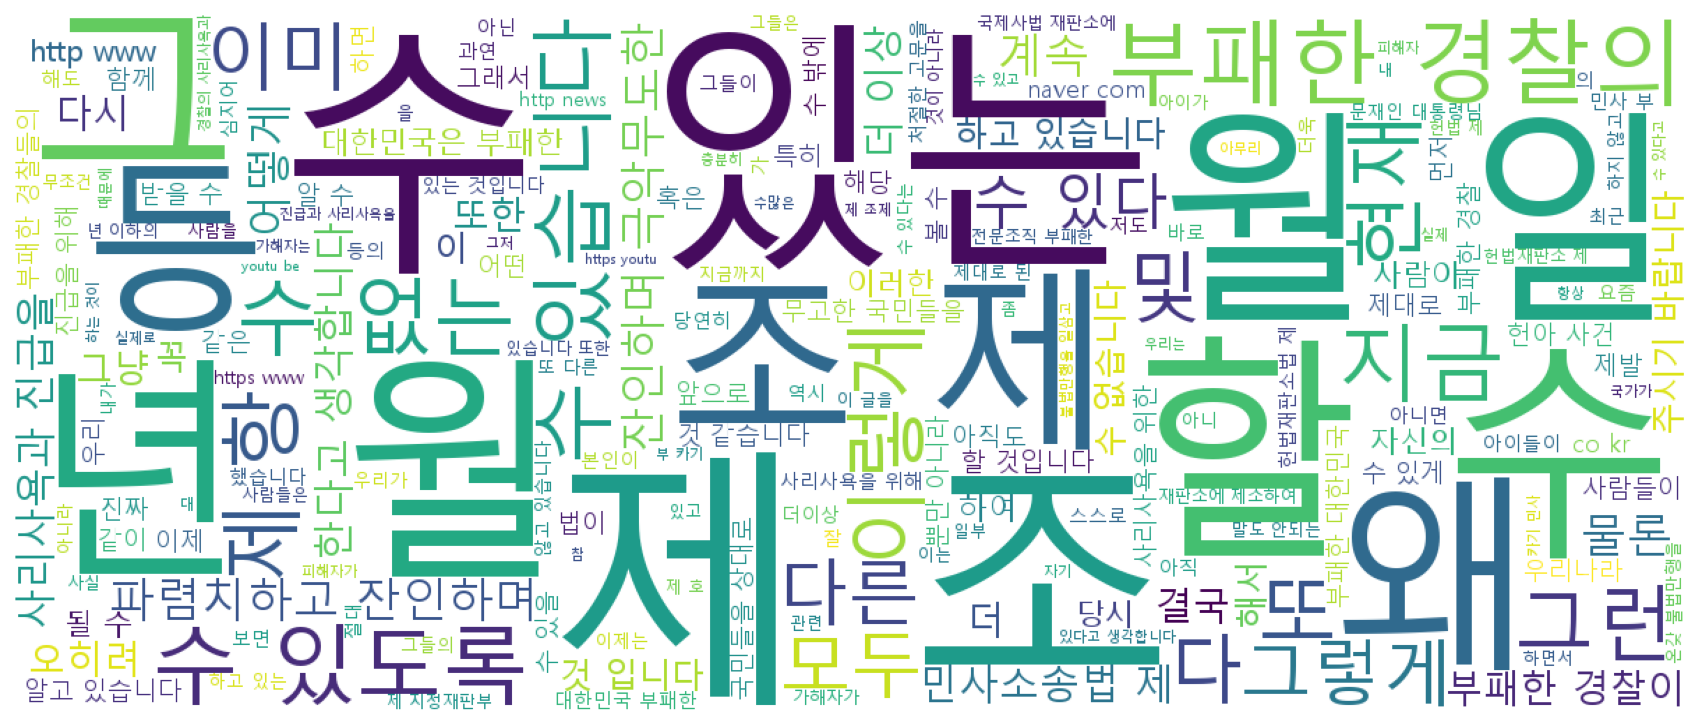

In [32]:
# display_word_cloud 함수 안에 font_path 위치
display_word_cloud(' '.join(content_text))

출력 결과를 보면 '수'나 '및'과 같이 문서의 의미를 특징 짓지 않는 불용어(STOPWORD)가 너무 많다는 것을 알 수 있다.


## 명사만 추출하여 시각화

In [33]:
from soynlp.noun import LRNounExtractor

- 주피터 노트북에서 실행 시간을 측정하는 매직 명령어   
    - %%time : 전체 셀의 실행 시간을 측정. 따라서 셀에 포함된 모든 코드의 실행 시간을 측정.  
    - %time : 한 줄의 코드나 한 줄의 표현식의 실행 시간을 측정. 따라서 코드 한 줄의 실행 시간만을 측정.

In [34]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(content_text)
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (318534, 160757) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 52138 nouns are extracted
CPU times: user 1min 6s, sys: 527 ms, total: 1min 6s
Wall time: 1min 7s


In [56]:
# 예시 불용어 리스트
stopwords = set([
    '이', '그', '저', '것', '등', '및', '의', '가', '을', '를', '에', '와', '과', '는', '도', '로', '으로', 
    '해서', '해서는', '대한', '위해', '하기', '또는', '그리고', '하지만', '그러나', '하면서', '과연', '정도로', '이런', '상황에서', '등으로', '속에서', '습니다'
    # 필요한 불용어 추가...
])

In [59]:
# Step 1: 중요한 단어 추출 기준 설정
def is_important(noun_data, noun, stopwords):
    frequency = noun_data.frequency
    score = noun_data.score
    known_r_ratio = noun_data.known_r_ratio
    
    # 불용어 제외
    if noun in stopwords:
        return False
    
    # 빈도수, 점수, 알려진 비율을 종합적으로 고려하여 중요한 단어로 간주
    return (score > 0.5) and (frequency > 10) and (known_r_ratio > 0.2)

# Step 2: 단어 사전 정렬 기준 설정
def sorting_criteria(noun_data):
    return (noun_data.score, noun_data.frequency, noun_data.known_r_ratio)

# Step 3: 상위 100개 단어 추출
def extract_top_100_important_nouns(noun_scores, stopwords):
    # 중요한 단어만 필터링
    important_nouns = {noun: data for noun, data in noun_scores.items() if is_important(data, noun, stopwords)}
    
    # 중요한 단어를 정렬하여 상위 100개 추출
    sorted_important_nouns = sorted(important_nouns.items(), key=lambda item: sorting_criteria(item[1]), reverse=True)
    top_100_nouns = dict(sorted_important_nouns[:100])
    
    return top_100_nouns

# 중요한 단어 100개 추출
top_100_nouns = extract_top_100_important_nouns(nouns, stopwords)
print(top_100_nouns)

{'않았습니다': NounScore_v1(frequency=2258, score=1.0, known_r_ratio=0.5), '없었습니다': NounScore_v1(frequency=2124, score=1.0, known_r_ratio=0.5), '국가에서': NounScore_v1(frequency=1894, score=1.0, known_r_ratio=1.0), '살기': NounScore_v1(frequency=1749, score=1.0, known_r_ratio=0.4472049689440994), '일은': NounScore_v1(frequency=1597, score=1.0, known_r_ratio=0.4), '분명히': NounScore_v1(frequency=1583, score=1.0, known_r_ratio=0.5), '범죄는': NounScore_v1(frequency=1528, score=1.0, known_r_ratio=0.3333333333333333), '아무것도': NounScore_v1(frequency=1513, score=1.0, known_r_ratio=0.5104166666666666), '도움이': NounScore_v1(frequency=1436, score=1.0, known_r_ratio=0.24444444444444444), '것이라고': NounScore_v1(frequency=1426, score=1.0, known_r_ratio=0.8571428571428571), '정도의': NounScore_v1(frequency=1347, score=1.0, known_r_ratio=0.3333333333333333), '수밖에': NounScore_v1(frequency=1339, score=1.0, known_r_ratio=0.5), '사람으': NounScore_v1(frequency=1302, score=1.0, known_r_ratio=0.375), '피해자에게': NounScore_v1(frequenc

In [58]:
top_100_nouns = extract_top_100_important_nouns(nouns)
print(top_100_nouns)

TypeError: extract_top_100_important_nouns() missing 1 required positional argument: 'stopwords'

In [35]:
nouns

{'젊은': NounScore_v1(frequency=1361, score=0.9547626101694916, known_r_ratio=0.07573812580231065),
 '회항': NounScore_v1(frequency=15, score=0.752362, known_r_ratio=1.0),
 '수학': NounScore_v1(frequency=242, score=0.508681, known_r_ratio=0.25462962962962965),
 '교권': NounScore_v1(frequency=227, score=0.5829722165605095, known_r_ratio=0.6356275303643725),
 '선회': NounScore_v1(frequency=41, score=0.9921302000000001, known_r_ratio=0.9210526315789473),
 '휴지': NounScore_v1(frequency=69, score=0.9992192631578947, known_r_ratio=0.2714285714285714),
 '일적': NounScore_v1(frequency=10, score=0.7140962857142856, known_r_ratio=0.7),
 '경험': NounScore_v1(frequency=1594, score=0.8149108720930234, known_r_ratio=0.7908045977011494),
 '분대': NounScore_v1(frequency=7, score=0.997334, known_r_ratio=0.05263157894736842),
 '싹쓸': NounScore_v1(frequency=2, score=0.9223050000000002, known_r_ratio=0.6341463414634146),
 '서한': NounScore_v1(frequency=12, score=0.504724, known_r_ratio=0.8888888888888888),
 '기원': NounScore_v

In [48]:
nouns['젊은'][1]

0.9547626101694916

In [40]:
nouns_text = " ".join(list(nouns.keys()))
nouns_text

'젊은 회항 수학 교권 선회 휴지 일적 경험 분대 싹쓸 서한 기원 복도 숙소 될것 이듬 죄의 군중 해박 무대 현세 공안 측근 뉘우 경주 이체 허덕 신씨 좋긴 유작 과열 철권 B형 용돈 둘레 뭉텅 컨셉 음성 당원 국위 소인 관상 정반 조진 얘길 잡일 하강 철장 체험 끝판 꽐라 반장 밥통 자막 파도 발한 약쟁 뉴욕 지긋 장려 체온 증가 야구 목도 전씨 쓴것 방구 경량 고귀 개밥 위암 납작 추접 순교 공통 학기 사막 써야 함미 뒷차 현경 시구 침수 요령 우루 낙타 첩경 빙산 저는 통행 말못 초혼 단절 블로 똑바 김보 하지 문콕 요강 이장 통증 함성 건장 괴성 조처 출국 소지 형법 개탄 날때 했을 나무 성년 통계 대선 매수 교섭 반국 본드 수협 선천 기류 봉고 명꼴 상법 정미 심은 미납 검창 법죄 미취 일환 자욱 척도 숙명 칼끝 양념 잘수 독려 조도 삼바 없슴 봉사 병신 영사 추척 페기 실갱 영속 사양 부목 변시 체크 유책 식견 수주 쓴거 였을 세례 장착 간여 디자 자서 막연 장림 편입 절정 수번 별표 cm 랭킹 둔다 고흐 상냥 원숭 구식 할짓 흉물 맨위 복권 악의 제시 달력 한채 월맹 법사 한길 생가 중동 결식 장자 무얼 추단 오수 여건 한끼 기본 시외 진지 항복 기수 조폭 분장 혁명 부응 뺑이 포교 병균 끌지 난치 옜날 피폭 외침 명작 귀국 쿠폰 년동 눈밑 파손 가죽 것뿐 엄준 합심 용처 나지 불빛 이자 외관 골재 소수 재삼 시누 유리 지영 간후 악어 욕정 여든 살판 북극 경증 티끌 퇴역 병명 하방 칼자 방침 청부 자야 한장 일다 친가 우익 묵언 순결 칠보 혈연 갯벌 빠듯 MB 솜씨 특채 복제 앞길 졸속 등치 홧김 아둔 남녀 소가 것은 했고 연접 됐을 바뀜 위수 테라 첨삭 각색 죄목 점점 조사 올무 경작 전문 한화 빨게 고가 발급 확보 막대 어굴 북간 해이 결핍 훈방 선두 엠티 십원 벤츠 부검 환우 전정 추락 집밖 지팡 물자 최용 요약 상호 손자 떳떳 벙벙 후드 분뇨 실지 들썩 타당 외국 승자 장사 입게 설날 과업 필연 머리 쾌쾌 공생 경향 흑자 아부 난장 지혈 

In [60]:
nouns_text = " ".join(list(top_100_nouns.keys()))
nouns_text

'않았습니다 없었습니다 국가에서 살기 일은 분명히 범죄는 아무것도 도움이 것이라고 정도의 수밖에 사람으 피해자에게 사람입니다 그러므 방법으 죄가 하나도 한국에서 해주십시 굉장히 외에 다음과 아이들에게 상당히 미래는 곳에서 몸이 법률에 국내에서 어이가 않아도 벌써 만에 인간으 호에 개혁이 힘들고 것들이 이슈가 사항이 학생들에게 사용하지 원인이 하였는데 아빠가 서민과 남에게 단순음주운 경찰에게 비록 명목으로 몸에 언론에서 나가서 모르겠지만 그렇지만 시기에 논란이 허나 때도 이것도 조치가 자신은 부모에게 자리에서 오면 때리고 본인들이 끝도 기록이 바에 믿지 우리도 의무는 가정에서 등과 많아서 여성들에게 성인과 측에서 의혹이 그러지 감형이 기회가 위험이 위주로 땅을 어디에도 땅에서 군대에서 전쟁을 될것이 죽임을 자신에게 범인이 보상이 소득이 대통령에게'

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


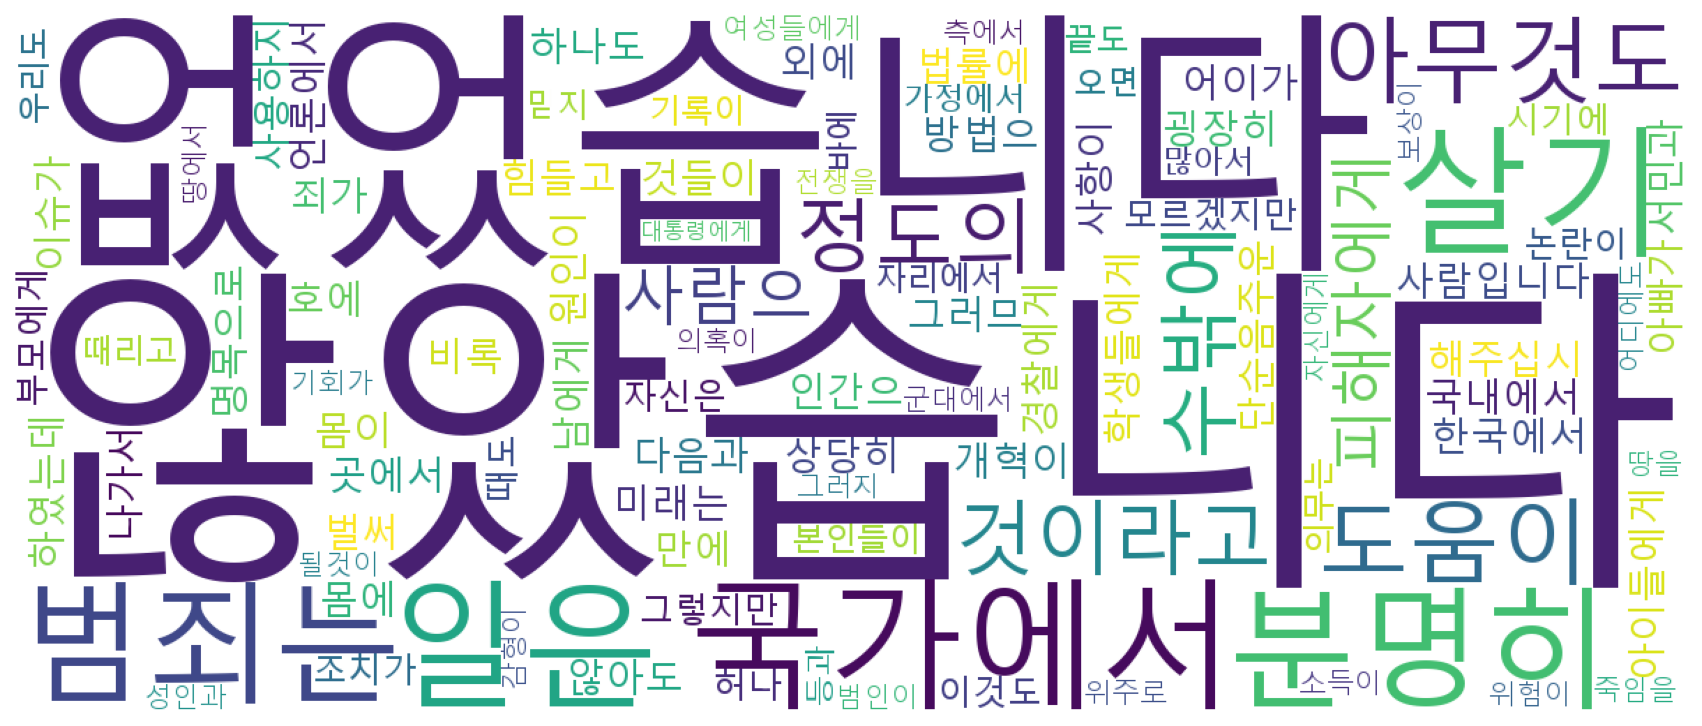

In [61]:
# 추출된 명사를 워크 클라우드를 통해 시각화한다.
%time
display_word_cloud(nouns_text)